In [2]:
#Input coordinates and radius return waterfall of freq vs. position
from geopy.distance import geodesic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dx = pd.read_csv("/Users/jakobperivolotis/Desktop/dataFM/resultsWorld/worldDataCoverage.csv")
x = dx.iloc[:, [2, 3]]
dy = dx.iloc[:, [0, 2, 3]]

def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

def filter_coords(origin, coords, radius):
    my_list = []
    for coordinate in coords:
        distance = calculate_distance(origin, coordinate)
        if distance < radius:
            my_list.append(coordinate)
    return my_list

def round_and_count(data):
    rounded_values = np.round(data).astype(int)
    counts = np.bincount(rounded_values)
    num_bins = 200
    if len(counts) < num_bins:
        counts = np.pad(counts, (0, num_bins - len(counts)), 'constant')
    elif len(counts) > num_bins:
        counts = counts[:num_bins]
    return counts.tolist()

if __name__ == "__main__":
    origins = [(-35, 109), (-7, 132), (22, 154), (43, -178), (51, -133), (39, -92), (17, -67), (-7, -50), (-31, -28), (-49, 5), (-49, 53)]  
    coords = list(x.itertuples(index=False, name=None))
    radius = 2333
    #altitude = 450km
    # speed required to stay in perfectly cirucular orbit is 7615 m/s
    results = []
    for origin in origins:
        my_list = filter_coords(origin, coords, radius)
        valid_results = [val for val in dy[dy[["Lat", "long"]].apply(tuple, axis=1).isin(my_list)].dropna()["freq"]]
        counts = round_and_count(valid_results)
        results.append(counts)
    p = results
#print(results)




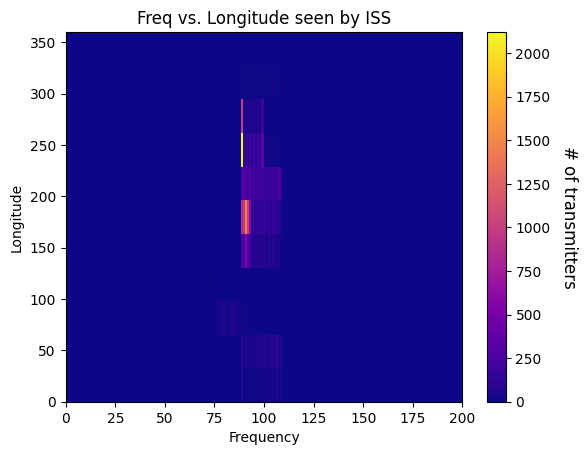

In [8]:

c = plt.imshow(p, cmap = "plasma", origin = "lower", interpolation = "none", extent = [0, 200, 0, 360], aspect = "auto")
cbar = plt.colorbar(c)
cbar.ax.set_ylabel("# of transmitters", rotation = 270, fontsize = 12, labelpad = 20)
plt.title("Freq vs. Longitude seen by ISS")
plt.xlabel("Frequency")
plt.ylabel("Longitude")

plt.show()

In [4]:
from geopy.distance import geodesic
import pandas as pd
import numpy as np

dx = pd.read_csv("/Users/jakobperivolotis/Desktop/dataFM/resultsWorld/worldDataCoverage.csv")
x = dx.iloc[:, [2, 3]]
dy = dx.iloc[:, [0, 2, 3]]

def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

def filter_coords(origin, coords, radius, counted_coords):
    my_list = []
    for coordinate in coords:
        distance = calculate_distance(origin, coordinate)
        if distance < radius and coordinate not in counted_coords:
            my_list.append(coordinate)
            counted_coords.add(coordinate)
    return my_list

def round_and_count(data):
    rounded_values = np.round(data).astype(int)
    counts = np.bincount(rounded_values)
    num_bins = 200
    if len(counts) < num_bins:
        counts = np.pad(counts, (0, num_bins - len(counts)), 'constant')
    elif len(counts) > num_bins:
        counts = counts[:num_bins]
    return counts.tolist()

def main():
    origins = [(90, -110), (0, -110), (-90, -110)]  
    coords = list(x.itertuples(index=False, name=None))
    radius = 591
    counted_coords = set()  
    results = []
    for origin in origins:
        my_list = filter_coords(origin, coords, radius, counted_coords)
        valid_results = [val for val in dy[dy[["Lat", "long"]].apply(tuple, axis=1).isin(my_list)].dropna()["freq"].tolist()]
        counts = round_and_count(valid_results)
        results.append(counts)
    return results

    #print(results)

if __name__ == "__main__":
   results = main()
    



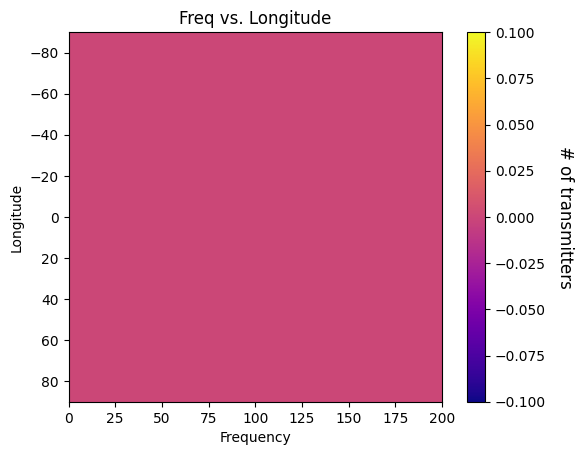

In [5]:
c = plt.imshow(results, cmap = "plasma", origin = "lower", interpolation = "none", extent = [0, 200, 90, -90], aspect = 1.1)
cbar = plt.colorbar(c)
cbar.ax.set_ylabel("# of transmitters", rotation = 270, fontsize = 12, labelpad = 20)
plt.title("Freq vs. Longitude")
plt.xlabel("Frequency")
plt.ylabel("Longitude")

plt.show()